In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#delete id
train.drop(columns=["Id"], inplace=True)

In [5]:
train.shape

(1460, 80)

Delete features that have more than 1000 null values (even though the null values mean something, these variables have the same value for almost all instances)

In [6]:
train.isna().sum()[lambda x: x > 1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [7]:
train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [8]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
numeric_features = train.select_dtypes(include=["int64", "float"])
numeric_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
# Check for categorical variables that may be represented with numbers:
number_distinct_values = [10, 20, 30]
possible_categorical = []


for col in numeric_features.columns:
    for n in number_distinct_values:
        distinct_values = train[col].nunique()
        if distinct_values < n:
            print(f"{col} has {distinct_values} distinct values. It's possible it is a categorical variable")
            possible_categorical.append(col)
            break


MSSubClass has 15 distinct values. It's possible it is a categorical variable
OverallQual has 10 distinct values. It's possible it is a categorical variable
OverallCond has 9 distinct values. It's possible it is a categorical variable
LowQualFinSF has 24 distinct values. It's possible it is a categorical variable
BsmtFullBath has 4 distinct values. It's possible it is a categorical variable
BsmtHalfBath has 3 distinct values. It's possible it is a categorical variable
FullBath has 4 distinct values. It's possible it is a categorical variable
HalfBath has 3 distinct values. It's possible it is a categorical variable
BedroomAbvGr has 8 distinct values. It's possible it is a categorical variable
KitchenAbvGr has 4 distinct values. It's possible it is a categorical variable
TotRmsAbvGrd has 12 distinct values. It's possible it is a categorical variable
Fireplaces has 4 distinct values. It's possible it is a categorical variable
GarageCars has 5 distinct values. It's possible it is a catego

In [11]:
possible_categorical

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

After checking the variable descriptions, categoricals in possible_categoricals:\
MSSubClass
MoSold


In [12]:
categorical_features = train.select_dtypes(include=['object'])
cat_int = ['MSSubClass', 'MoSold']
for c in cat_int:
    numeric_features.drop(columns=[c], inplace=True)
    categorical_features[c] = train[c]
categorical_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,60,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20,5
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,9
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,70,2
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,8
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Attchd,Unf,TA,TA,Y,WD,Normal,20,2
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,70,5
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,Attchd,Unf,TA,TA,Y,WD,Normal,20,4


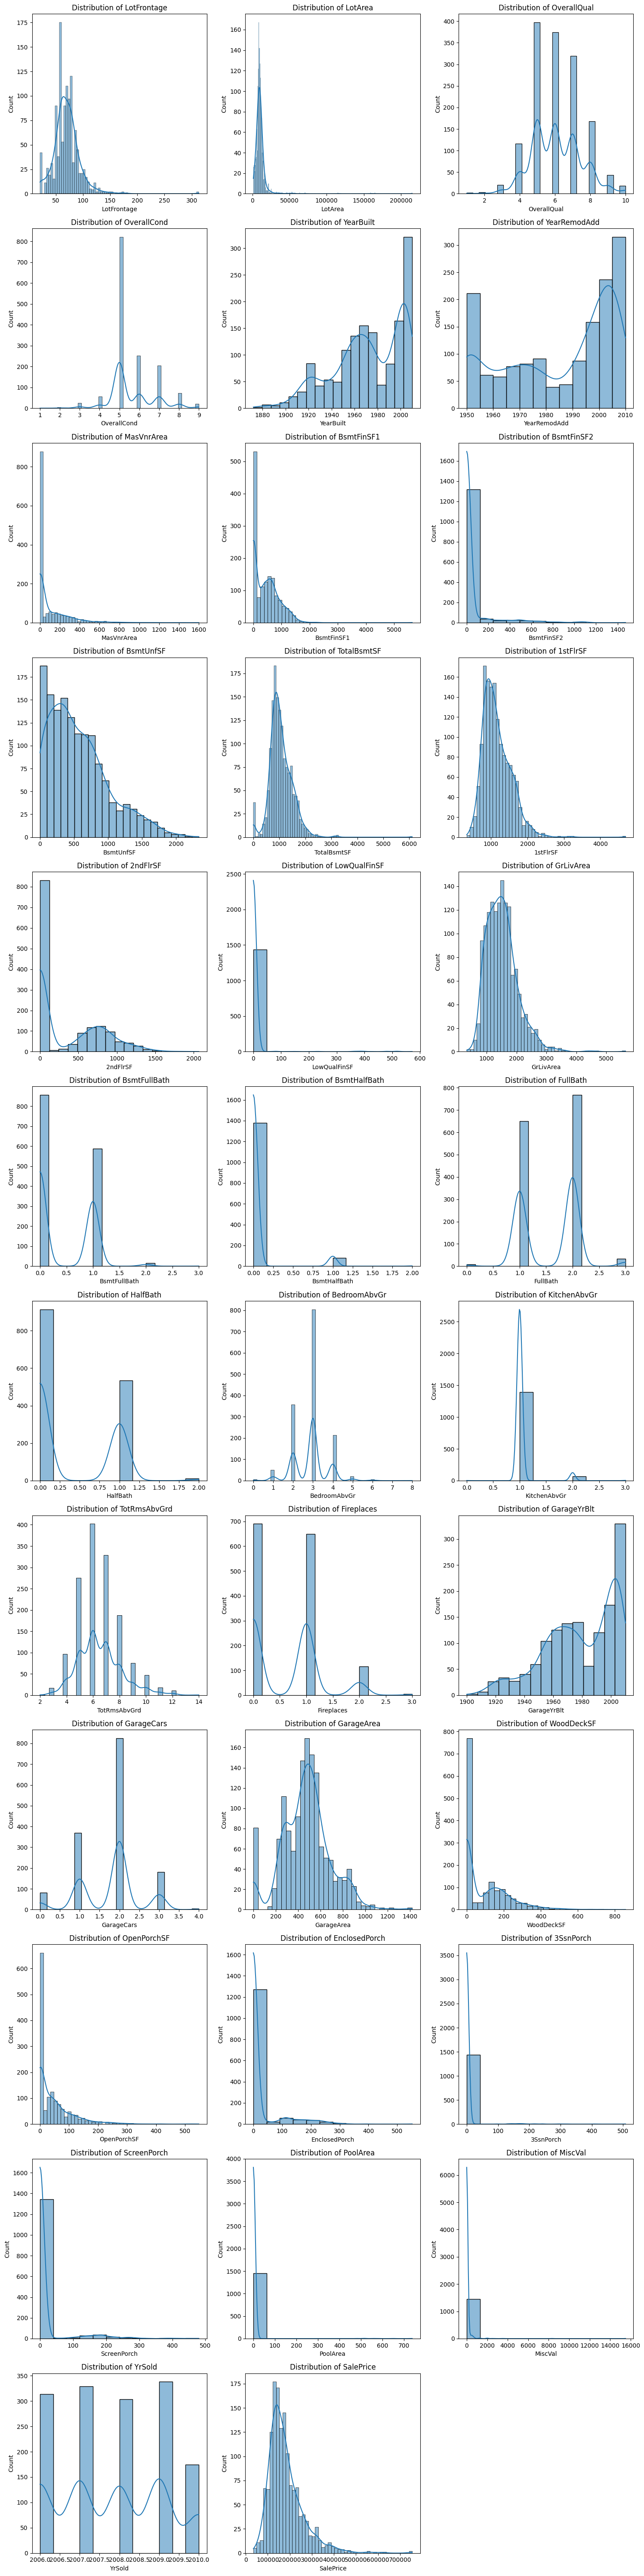

In [13]:
# Calculate grid dimensions
n_cols = len(numeric_features.columns)
n_rows = int(np.ceil(n_cols / 3))

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numeric_features.columns):
    sns.histplot(numeric_features[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

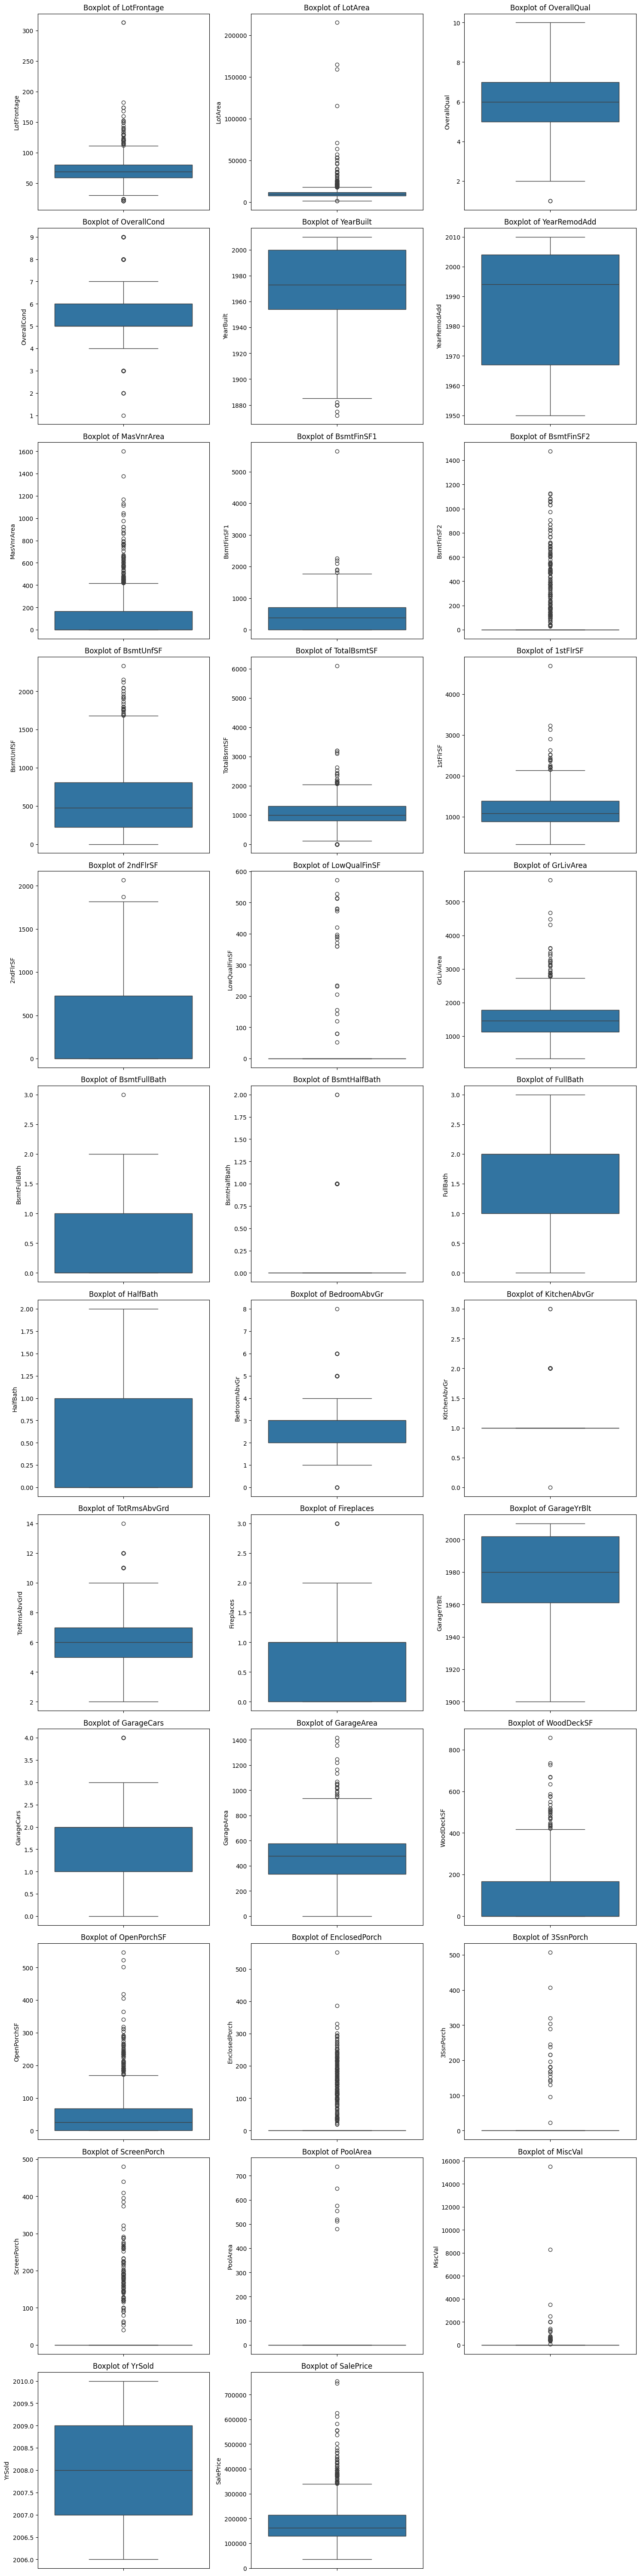

In [14]:
# Calculate grid dimensions
n_cols = len(numeric_features.columns)
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numeric_features.columns):
    sns.boxplot(y=numeric_features[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Remove highly skewed variables:\
MasVnrArea
BsmtFinSF2
LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal

In [15]:
remove_numerical_cols = ['MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath', 'KitchenAbvGr']

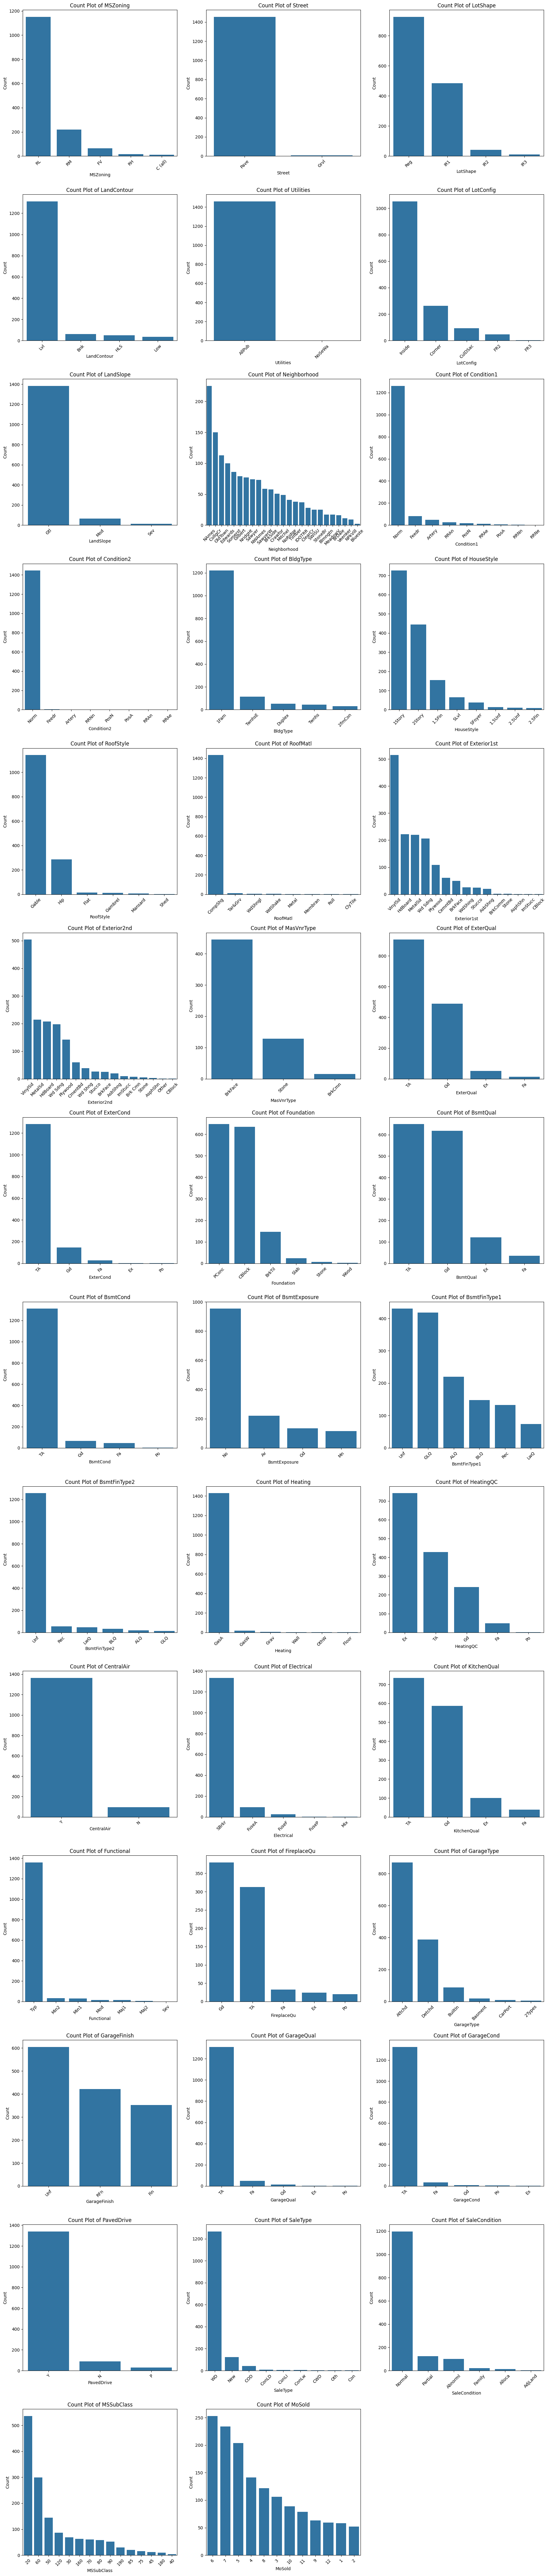

In [16]:
# Calculate grid dimensions
n_cols = len(categorical_features.columns)
n_rows = int(np.ceil(n_cols / 3))

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_features.columns):
    sns.countplot(data=categorical_features, x=column, ax=axes[i], order=categorical_features[column].value_counts().index)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

There are a bunch of variables that appear to have the same value for almost all instances, let's automatize the process of removing this variables by setting a 90% Threshold

In [17]:
# Remove categorical variables where 90% or more of the instances have the same value
remove_cat_cols = []

for col in categorical_features.columns:
    if categorical_features[col].value_counts().max() >= categorical_features.shape[0] * 0.9:
      print(f"La columna {col} tiene más del 90% de instancias con el mismo valor")
      remove_cat_cols.append(col)

La columna Street tiene más del 90% de instancias con el mismo valor
La columna Utilities tiene más del 90% de instancias con el mismo valor
La columna LandSlope tiene más del 90% de instancias con el mismo valor
La columna Condition2 tiene más del 90% de instancias con el mismo valor
La columna RoofMatl tiene más del 90% de instancias con el mismo valor
La columna Heating tiene más del 90% de instancias con el mismo valor
La columna CentralAir tiene más del 90% de instancias con el mismo valor
La columna Electrical tiene más del 90% de instancias con el mismo valor
La columna Functional tiene más del 90% de instancias con el mismo valor
La columna GarageCond tiene más del 90% de instancias con el mismo valor
La columna PavedDrive tiene más del 90% de instancias con el mismo valor


In [18]:
print(remove_numerical_cols)
print(remove_cat_cols)

['MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath', 'KitchenAbvGr']
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


In [19]:
numeric_features.drop(columns=remove_numerical_cols, inplace=True)
categorical_features.drop(columns=remove_cat_cols, inplace=True)

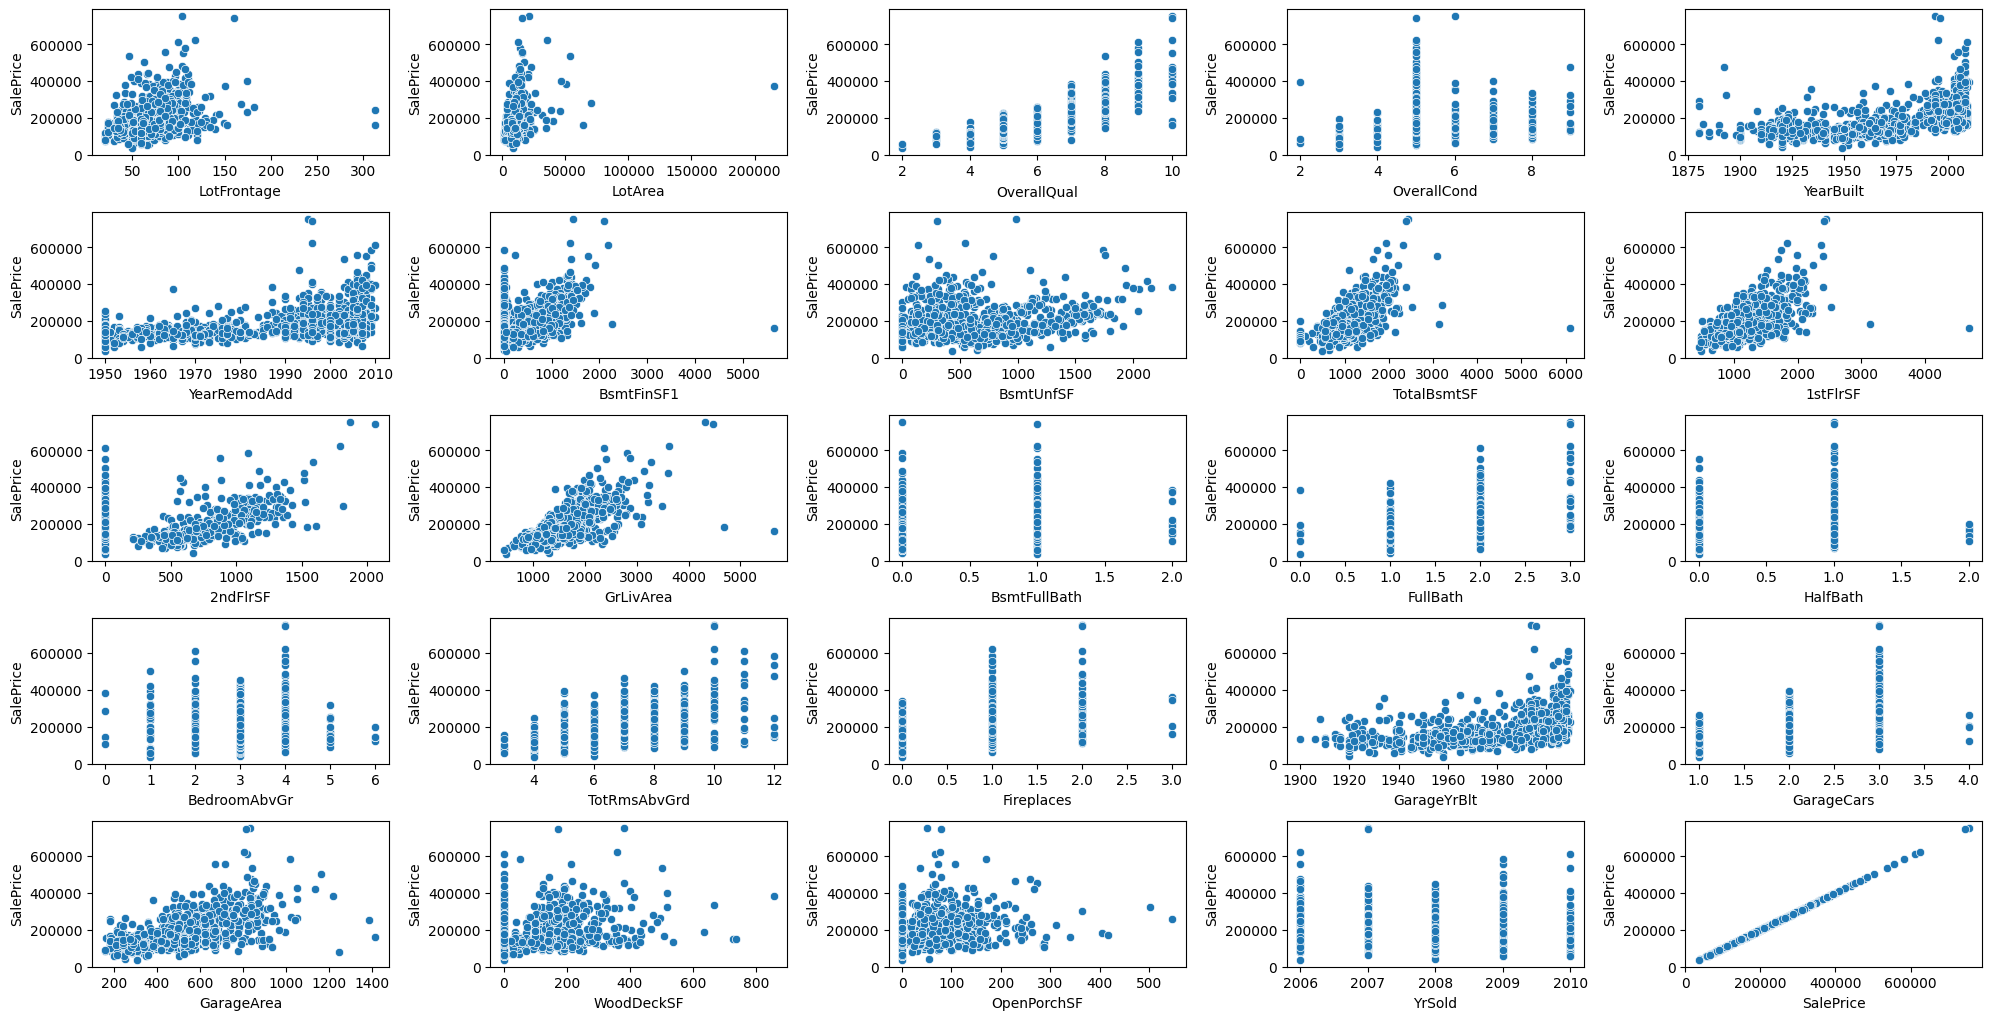

In [20]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_features.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_features.iloc[:,index], y='SalePrice', data=numeric_features.dropna())
fig.tight_layout(pad=1.0)

It's seems there are no non-linear relationships between any variable and SalePrice

In [21]:
numeric_features.corr().loc['SalePrice'][lambda x: (x > 0.5) | (x < -0.2)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

Lets keep the variables that have at least 0.3 pearson with SalePrice\
No variable seems to have a strong inverse correlation with SalePrice

In [22]:
numeric_features = numeric_features[numeric_features.corr().loc['SalePrice'][lambda x: (x > 0.5) | (x < -0.2)].index.to_list()]
numeric_features

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


<Axes: >

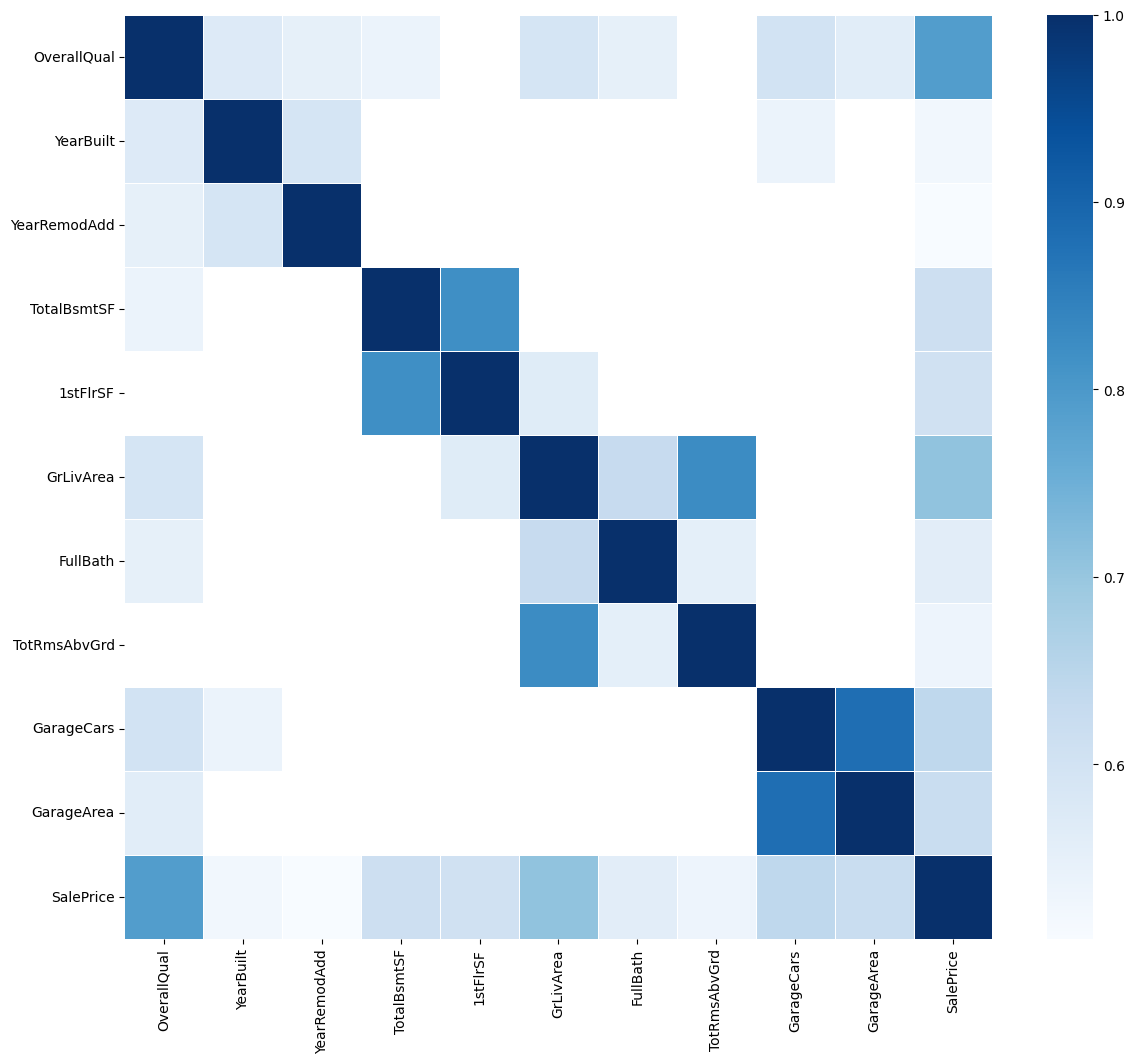

In [23]:
plt.figure(figsize=(14,12))
correlation = numeric_features.corr()
sns.heatmap(correlation, mask = correlation <0.5, linewidth=0.5, cmap='Blues')

Conclusions for numeric variables:\
Many variables show strong correlations with OverallQual, suggesting that it captures information shared by several other features.
Since OverallQual also has the highest correlation with SalePrice, it serves as a strong overall indicator of property value.
To reduce redundancy while preserving predictive power, I will retain OverallQual and select additional variables that have lower correlation with it, ensuring that each contributes unique information to the prediction.\
So I will keep:
1. OverallQual
2. 1stFlrSF
3. TotRmsAbvGrd


Now let's analyze the categorical variables

In [24]:
categorical_features['SalePrice'] = numeric_features['SalePrice']

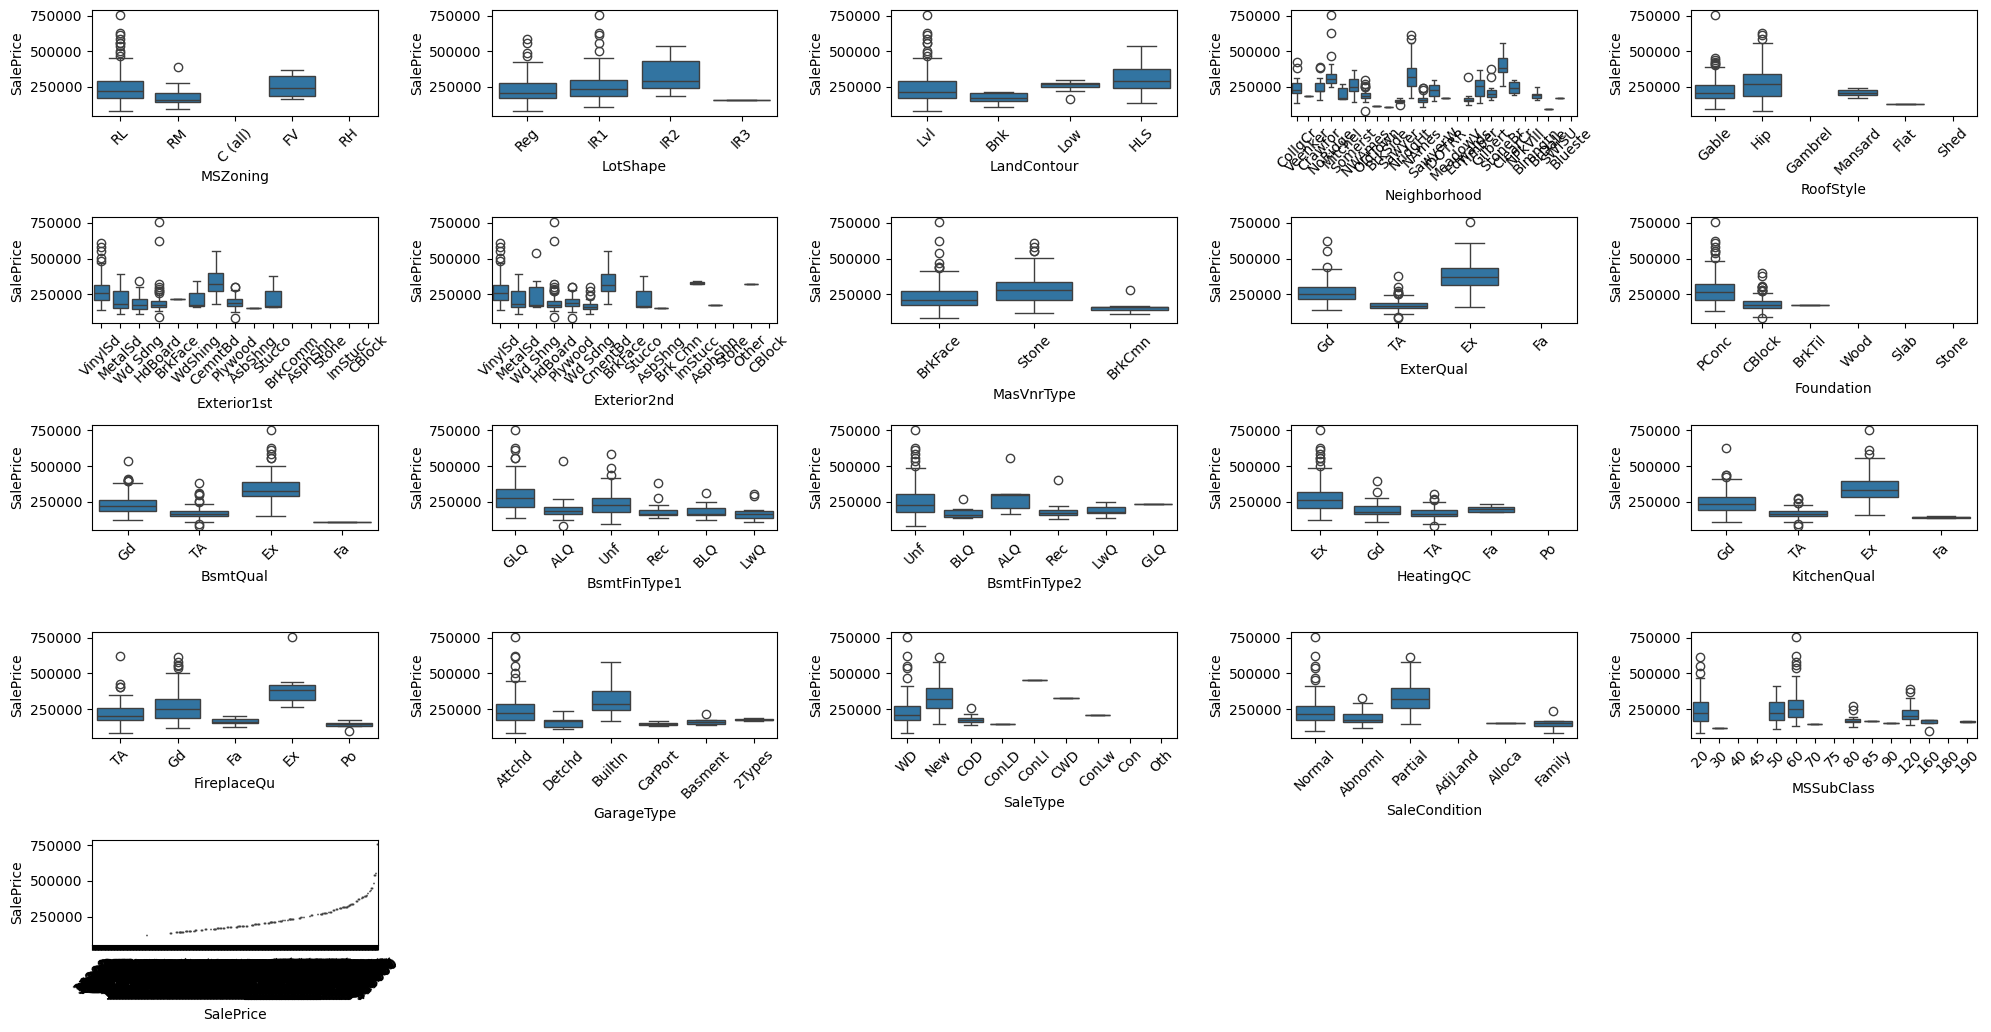

In [48]:
fig = plt.figure(figsize=(20,20))
for index in range(len(categorical_features.columns)):
    plt.subplot(10,5,index+1)
    sns.boxplot(x=categorical_features.iloc[:,index], y='SalePrice', data=categorical_features.dropna())
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
fig.tight_layout(pad=1.0)

KitchenQual and BsmtQual very similar to each other, we will only need one. I will choose KitchenQual, it has less outliers

I will choose based on the graph, distribution and number of possible values a few variables that makes sense to me.

Previous approach: (I will be removing the following variables because they don't seem to affect SalePrice that much:\
LotConfig, Condition1, Bldgtype, HouseStyle, ExterCond, BsmtCond, BsmtExposure, GarageFinish, GarageQual,  MoSold, )

exterqual, foundation, KitchenQual, landcontour, exterqual, heatingqc, SaleType

In [57]:
for col in categorical_features.columns:
    if col in ["SaleCondition","GarageType","BsmtQual","BsmtFinType1","BsmtFinType2","MasVnrType","RoofStyle","LotConfig","LotShape","Condition1","BldgType","HouseStyle","ExterCond","BsmtCond","BsmtExposure","GarageFinish","GarageQual","MoSold","SalePrice","Neighborhood", "MsSubclass", "MSZoning", "Exterior1st", "Exterior2nd", "MSSubClass"]:
        continue
    print(f"{col}: {categorical_features[col].value_counts()}\nNull values: {categorical_features[col].isna().sum()}\n", "-"*20)

LandContour: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Null values: 0
 --------------------
ExterQual: ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
Null values: 0
 --------------------
Foundation: Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64
Null values: 0
 --------------------
HeatingQC: HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64
Null values: 0
 --------------------
KitchenQual: KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
Null values: 0
 --------------------
FireplaceQu: FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
Null values: 690
 --------------------
SaleType: SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int

In [ ]:
"""
categorical_features.drop(columns=[
    "LotConfig",
    "Condition1",
    "BldgType",
    "HouseStyle",
    "ExterCond",
    "BsmtCond",
    "BsmtExposure",
    "GarageFinish",
    "GarageQual",
    "MoSold"
], inplace=True)
"""

categorical_features = categorical_features[]

SyntaxError: incomplete input (3297421459.py, line 1)

In [27]:
categorical_features.head(5)

,MSZoning,LotShape,LandContour,Neighborhood,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,SaleType,SaleCondition,MSSubClass,SalePrice
0,RL,Reg,Lvl,CollgCr,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,GLQ,Unf,Ex,Gd,NaN,Attchd,WD,Normal,60,208500
1,RL,Reg,Lvl,Veenker,Gable,MetalSd,MetalSd,NaN,TA,CBlock,...,ALQ,Unf,Ex,TA,TA,Attchd,WD,Normal,20,181500
2,RL,IR1,Lvl,CollgCr,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,GLQ,Unf,Ex,Gd,TA,Attchd,WD,Normal,60,223500
3,RL,IR1,Lvl,Crawfor,Gable,Wd Sdng,Wd Shng,NaN,TA,BrkTil,...,ALQ,Unf,Gd,Gd,Gd,Detchd,WD,Abnorml,70,140000
4,RL,IR1,Lvl,NoRidge,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,GLQ,Unf,Ex,Gd,TA,Attchd,WD,Normal,60,250000


Now that we have the features we want, we can start Feature Engineering

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

       

In [28]:
categorical_features.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition', 'MSSubClass',
       'SalePrice'],
      dtype='object')